# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [68]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 226 (delta 106), reused 177 (delta 57), pack-reused 0
Receiving objects: 100% (226/226), 35.64 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/machine_learning_1/perceptron_algorithm/machine_learning_1/perceptron_algorithm


In [69]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [70]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

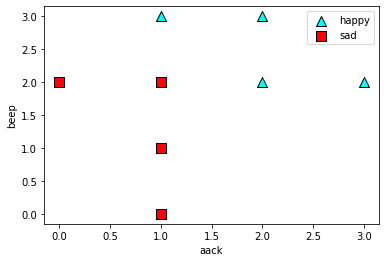

In [71]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [97]:
def step(x):
    ## TODO ##
    # implement step function
    if x <0:
      output =0
    else:
      output = 1
    return output

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    a,b = weights
    x1,x2 =features
    output = a * x1 + b*x2 +bias
    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    output = step (score(weights, bias, features))
    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    if label == prediction(weights, bias, features) :
      return 0
    else:
      return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [98]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ## 
    # update the weights and bias using a single data sample

    weights[0] = weights[0]+ learning_rate * (label -prediction(weights, bias, features)) * features[0]
    weights[1] = weights[1]+ learning_rate * (label -prediction(weights, bias, features)) * features[1]
    bias =bias + learning_rate *(label -prediction(weights, bias, features))
    return weights, bias

### Running the perceptron algorithm

In [102]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs 
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    for ep in range(epochs) :
      feature, label = random.choice(list (zip (features, labels)))
      weights, bias = perceptron_trick(weights, bias, feature, label, learning_rate)
      errors.append (mean_perceptron_error(weights, bias, features, labels))
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

In [103]:
print ()

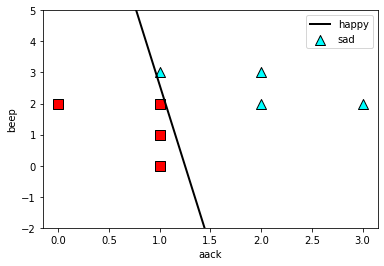

([0.5199999999999996, 0.049999999999999364], -0.6500000000000004)

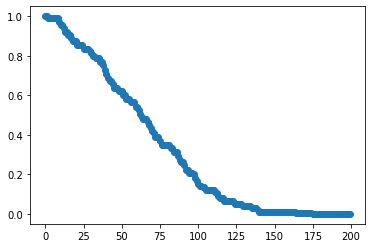

In [104]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [76]:
from sklearn.linear_model import Perceptron
## TODO ##
# Use SKlearn to train perceptron algorithm
clf=Perceptron(random_state=42)
clf.fit(features, labels)

Perceptron(random_state=42)

In [77]:
clf.score(features, labels)

1.0

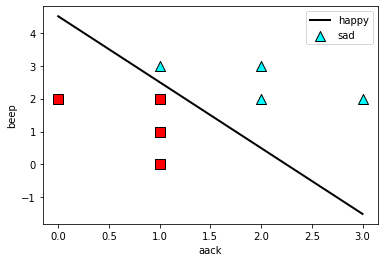

In [78]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()